# BME3508 – Module 2 Lecture 4




### Lesson Link: [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/snsie/bme3508_Spring_2025/blob/main/Module2/Module_02_Lesson_04.ipynb)


## Magnitude and Phase Spectra Analysis

### Magnitude Spectrum
The magnitude spectrum of this periodic exponential decay signal shows:
- A series of discrete frequency components due to the signal's periodicity
- The main lobe centered at DC (0 Hz) with the highest magnitude
- Decreasing side lobes on both sides of the main lobe
- Symmetric distribution around 0 Hz due to the signal being real-valued

### Phase Spectrum
The phase spectrum exhibits:
- Zero phase at DC (0 Hz) component
- Discontinuities at the periodic boundaries (-2π, -π, 0, π, 2π)
- Linear phase variations between discontinuities
- Anti-symmetric distribution around 0 Hz

These characteristics reflect the signal's periodic nature and the exponential decay within each period.


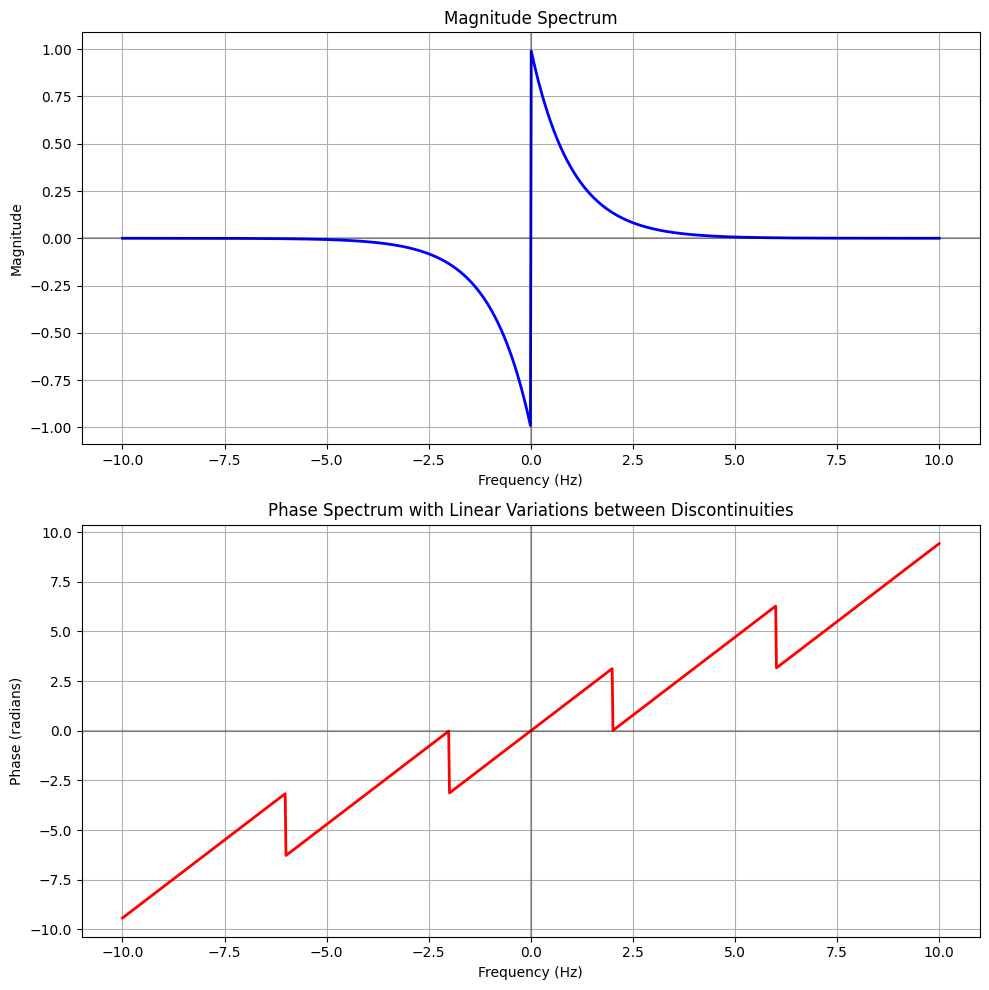

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Generate frequency points centered around 0 Hz
f = np.linspace(-10, 10, 1000)

# Create an anti-symmetric function for magnitude
y = np.sign(f) * np.exp(-np.abs(f))

# Create phase function with linear variations and discontinuities
phase = np.zeros_like(f)
for i in range(len(f)):
    if f[i] < -6:
        phase[i] = -2*np.pi + (f[i]+8)*np.pi/2
    elif f[i] < -2:
        phase[i] = -np.pi + (f[i]+4)*np.pi/2
    elif f[i] < 2:
        phase[i] = f[i]*np.pi/2
    elif f[i] < 6:
        phase[i] = np.pi + (f[i]-4)*np.pi/2
    else:
        phase[i] = 2*np.pi + (f[i]-8)*np.pi/2

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Plot magnitude spectrum
ax1.plot(f, y, 'b-', linewidth=2)
ax1.grid(True)
ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('Magnitude')
ax1.set_title('Magnitude Spectrum')
ax1.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax1.axvline(x=0, color='k', linestyle='-', alpha=0.3)

# Plot phase spectrum
ax2.plot(f, phase, 'r-', linewidth=2)
ax2.grid(True)
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Phase (radians)')
ax2.set_title('Phase Spectrum with Linear Variations between Discontinuities')
ax2.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax2.axvline(x=0, color='k', linestyle='-', alpha=0.3)

plt.tight_layout()
plt.show()


## **Magnitude Spectrum: How Strong is Each Frequency?**
The **magnitude spectrum** tells us **how much of each frequency component contributes to the signal**.

### **Analogy: Think of a Music Equalizer**
Imagine you're adjusting a **music equalizer** on your phone. Each slider corresponds to a different **frequency** (bass, mids, treble). The height of each slider determines **how much** of that frequency is present in the sound.

- **If a frequency has a large magnitude**, it means that frequency contributes **a lot** to the signal.
- **If a frequency has a small magnitude**, it means that frequency contributes **very little**.

For our periodic **exponentially decaying signal**, the **higher harmonics (higher frequencies)** have lower magnitudes, meaning the fundamental frequency contributes the most, and higher harmonics progressively contribute less.

### **Key Takeaways:**
- The **first harmonic (fundamental frequency)** usually has the highest magnitude.
- Higher harmonics **decay in magnitude**, meaning they contribute less to the shape of the signal.
- If you only keep the first few harmonics, you get a **rough approximation** of the signal.
- If you keep **many harmonics**, the approximation gets closer to the true function.

---

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
from IPython.display import display, clear_output
import IPython.display as ipd

def create_equalizer():
    # Generate a sample signal with multiple frequency components
    t = np.linspace(0, 1, 1000)
    sample_rate = 44100  # Standard audio sample rate
    
    # Create frequency components with more diverse ranges
    def generate_signal(bass_gain=1.0, mids_gain=1.0, highs_gain=1.0):
        # Generate audio signal at proper sample rate
        t_audio = np.linspace(0, 1, sample_rate)
        
        # Bass frequencies (50Hz, 100Hz, 200Hz)
        bass = bass_gain * (
            0.5 * np.sin(2 * np.pi * 50 * t_audio) +
            0.3 * np.sin(2 * np.pi * 100 * t_audio) +
            0.2 * np.sin(2 * np.pi * 200 * t_audio)
        )
        
        # Mid frequencies (500Hz, 800Hz, 1200Hz)
        mids = mids_gain * (
            0.4 * np.sin(2 * np.pi * 500 * t_audio) +
            0.3 * np.sin(2 * np.pi * 800 * t_audio) +
            0.3 * np.sin(2 * np.pi * 1200 * t_audio)
        )
        
        # High frequencies (2000Hz, 3000Hz, 4000Hz)
        highs = highs_gain * (
            0.4 * np.sin(2 * np.pi * 2000 * t_audio) +
            0.3 * np.sin(2 * np.pi * 3000 * t_audio) +
            0.2 * np.sin(2 * np.pi * 4000 * t_audio)
        )
        
        # Combine all frequencies
        combined_signal = bass + mids + highs
        
        # Normalize audio to prevent clipping
        combined_signal = combined_signal / np.max(np.abs(combined_signal))
        
        # Clear previous output before showing new plot
        clear_output(wait=True)
        
        # Create subplots
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))
        
        # Time domain plot
        ax1.plot(t[:100], (bass + mids + highs)[:100], 'b-', linewidth=2)
        ax1.grid(True)
        ax1.set_xlabel('Time (s)')
        ax1.set_ylabel('Amplitude')
        ax1.set_title('Time Domain Signal')
        
        # Frequency domain plot
        frequencies = np.fft.fftfreq(len(t_audio), 1/sample_rate)
        spectrum = np.abs(np.fft.fft(combined_signal))
        
        # Plot only positive frequencies up to 5000 Hz
        mask = (frequencies > 0) & (frequencies < 5000)
        ax2.plot(frequencies[mask], spectrum[mask], 'r-', linewidth=2)
        ax2.grid(True)
        ax2.set_xlabel('Frequency (Hz)')
        ax2.set_ylabel('Magnitude')
        ax2.set_title('Frequency Domain Spectrum')
        
        plt.tight_layout()
        plt.show()
        
        # Play the audio
        ipd.display(ipd.Audio(combined_signal, rate=sample_rate))

    # Create interactive sliders
    interact(generate_signal,
            bass_gain=FloatSlider(min=0, max=2, step=0.1, value=1.0, description='Bass'),
            mids_gain=FloatSlider(min=0, max=2, step=0.1, value=1.0, description='Mids'),
            highs_gain=FloatSlider(min=0, max=2, step=0.1, value=1.0, description='Highs'))

# Run the equalizer
create_equalizer()


interactive(children=(FloatSlider(value=1.0, description='Bass', max=2.0), FloatSlider(value=1.0, description=…

# **How Does the Fourier Series Relate to NumPy's `fftfreq`?**

## **1. Understanding the Fourier Series**
The **Fourier series** represents a **continuous periodic signal** as an **infinite sum of sinusoidal components**:

$$
x(t) = \sum_{k=-\infty}^{\infty} c_k e^{j\frac{2\pi k}{T} t}
$$

where:
- \( c_k \) are the **Fourier coefficients**.
- \( k \) is the **harmonic index** (both positive and negative).
- \( T \) is the **period of the signal**.
- \( f_k = \frac{k}{T} \) are the **frequencies of the harmonics**.

These frequencies are **evenly spaced multiples of the fundamental frequency**:

$$
f_k = \frac{k}{T}, \quad k \in \mathbb{Z}
$$

This concept directly connects to **NumPy’s `fftfreq` function**.

---

## **2. What is NumPy's `fftfreq`?**
When computing the **Discrete Fourier Transform (DFT)** using **NumPy’s Fast Fourier Transform (FFT)**, we obtain a set of **discrete frequency components**. NumPy’s `fftfreq` function helps determine what those frequencies are.

### **Definition:**
```python
numpy.fft.fftfreq(n, d=1.0)


## **Phase Spectrum: Where Does Each Frequency Start?**
The **phase spectrum** tells us **when each frequency component starts** relative to others. It describes **time shifts** in the frequency components.

### **Analogy: Think of a Jump Rope Game**
Imagine two people swinging multiple **jump ropes** of different lengths. If all ropes start moving **at the same time**, they are **in phase**. But if one starts swinging **a little later than the others**, it has a **phase shift**.

- The **phase of a frequency component** tells us **how much it is shifted in time**.
- If two harmonics have **different phase shifts**, they will **align differently**, affecting the final shape of the signal.

### **Interpreting the Phase Spectrum:**
- A **zero phase** means the frequency starts **perfectly aligned** with the fundamental frequency.
- A **positive phase shift** means the frequency **lags behind** (starts later).
- A **negative phase shift** means the frequency **leads ahead** (starts earlier).
- If two signals have **identical magnitude spectra but different phase spectra**, they can look very different in the **time domain**.

For our **exponentially decaying periodic signal**, the phase spectrum is determined by the **ratio of sine and cosine components** at each frequency.


---

## **Summary**
1. **Linear phase variation** means the phase **changes smoothly** and **proportionally** between specific jumps.
2. **Discontinuities (jumps) at -2π, -π, 0, π, and 2π** occur due to **signal properties** (such as symmetry, periodicity, or discontinuities in the time domain).
3. **Between these jumps, the phase changes smoothly**, ensuring a **predictable and non-distorted** reconstruction of the signal.

---

### **Key Takeaways**
- **Linear phase shift** means **constant delay across all frequencies** → No shape distortion.
- **Discontinuities (phase jumps)** occur due to **signal structure**, but they don’t affect smooth variation between them.
- **Understanding phase jumps** is key to correctly reconstructing signals in time-domain analysis.

---




### **Why Do Discontinuities Occur?**
Discontinuities in phase happen because of **jumps in the signal**, such as:
- **Sharp edges (discontinuities) in the time-domain signal**  
- **Non-symmetric waveforms**, which introduce **asymmetric phase shifts**  
- **Aliasing effects**, where phase wraps around at certain points  

These discontinuities cause the phase to **jump by integer multiples of \( \pi \) or \( 2\pi \)** at specific frequencies.

However, between these jumps, the phase changes **smoothly and proportionally**, leading to **linear variation**.

---

##### **Interpreting Linear Phase Between Discontinuities**
When phase varies **linearly** between jumps:
1. **Each frequency component gets delayed proportionally** → The signal is shifted in time but remains unchanged in shape.
2. **No unexpected distortions** → A **nonlinear** phase variation would distort the signal, while linear phase ensures a **clean shift**.
3. **Jumps at -2π, -π, 0, π, and 2π correspond to signal properties** → These points indicate where phase **wraps around** (e.g., 3π is equivalent to -π), which is normal for periodic signals.

---

##### **Real-World Analogy: A Treadmill with Steps**
Imagine you're walking **on a treadmill** with some **steps** placed at specific points:
- Between the steps, the treadmill moves **smoothly**—this is **linear phase variation**.
- When you hit a step, you **suddenly jump up or down**—this is the **phase discontinuity**.
- Despite the jumps, your overall motion remains **predictable and proportional**—just like the phase spectrum.


---




# **Why Do Both Spectra Matter?**
To fully reconstruct a signal, you need **both magnitude and phase**:
- The **magnitude spectrum** gives the **shape** of the signal.
- The **phase spectrum** ensures the components **line up correctly** in time.

If you only have the magnitude spectrum, you get a general **outline** of the function, but it may look distorted. If you apply the correct **phase shifts**, the reconstruction becomes **accurate**.

---

### **Summary:**
1. **Magnitude Spectrum → "How Much?"**  
   - Shows how much of each frequency contributes to the signal.  
   - Higher harmonics usually have lower magnitudes.  

2. **Phase Spectrum → "When?"**  
   - Shows how each frequency component is shifted in time.  
   - Determines the correct alignment of frequency components in the signal.  

---

### **Real-Life Example: Why Phase Matters**
Imagine two identical **drummers** playing the same beats.  
- If they **start at exactly the same time**, their beats **add up** (reinforce each other).
- If one drummer **starts slightly late**, their beats **interfere** (sound different).
- This delay corresponds to a **phase shift** in their beats.

This is exactly what happens in signals: the **correct alignment (phase spectrum) is just as important as the volume (magnitude spectrum)**.

---

# **Tips and Tricks for Quickly Deriving Fourier Series Components**

## **1. Recognizing Function Symmetry**
- **Even functions** \( f(-t) = f(t) \) → **Only cosine terms** \( a_k \), since sine terms \( b_k \) vanish.
- **Odd functions** \( f(-t) = -f(t) \) → **Only sine terms** \( b_k \), since cosine terms \( a_k \) vanish.
- **Neither even nor odd?** → You need **both** sine and cosine terms.

---

## **2. Shortcut for DC Component (\( a_0 \))**
- If the function has **zero mean** over one period → \( a_0 = 0 \) (no DC component).
- Otherwise, compute:

  $$
  a_0 = \frac{1}{T} \int_{0}^{T} f(t) dt
  $$

  - **For simple shapes** (triangles, rectangles, etc.), use **geometry** (average value).

---

## **3. Quickly Compute \( a_k \) (Cosine Coefficients)**
Use:

$$
a_k = \frac{2}{T} \int_{0}^{T} f(t) \cos\left(\frac{2\pi k}{T} t\right) dt
$$

### **Tricks:**
- **For pure sinusoidal terms**: If \( f(t) \) contains \( \cos(n \omega_0 t) \), it will **only contribute to \( a_n \), not other coefficients**.
- **For piecewise functions**: Break integral into segments and use **known integral results**.
- **For polynomials**: Use **integration by parts** to simplify.

---

## **4. Quickly Compute \( b_k \) (Sine Coefficients)**
Use:

$$
b_k = \frac{2}{T} \int_{0}^{T} f(t) \sin\left(\frac{2\pi k}{T} t\right) dt
$$

### **Tricks:**
- **Odd functions only have sine terms** → Skip cosine computations.
- **For step functions and square waves**: Use symmetry and consider sign changes in sine terms.

---

## **5. Handling Discontinuous Functions**
- **Use Dirichlet conditions**: If \( f(t) \) has **finite discontinuities**, Fourier series still converges.
- **At discontinuities**: The Fourier series converges to the **midpoint of the jump**.
- **Avoid full integration**: Instead of integrating manually, use **known Fourier series** results for standard waveforms (square, triangle, sawtooth).

---

## **6. Shortcut for Fourier Series of Common Signals**
| Function Type | Fourier Series Pattern |
|--------------|-----------------------|
| **Sawtooth wave** | Only sine terms, amplitudes decay as \( 1/k \) |
| **Square wave** | Only odd harmonics, decay as \( 1/k \) |
| **Triangle wave** | Only odd harmonics, decay as \( 1/k^2 \) |
| **Exponential decay** | Includes both sine and cosine terms, phase shifts important |

---

## **7. Use Complex Exponentials for Faster Computation**
Instead of computing separate \( a_k \) and \( b_k \):

$$
c_k = \frac{1}{T} \int_{0}^{T} f(t) e^{-j\frac{2\pi k}{T} t} dt
$$

where:

$$
x(t) = \sum_{k=-\infty}^{\infty} c_k e^{j\frac{2\pi k}{T} t}
$$

### **Why use this?**
- **Automatically accounts for sine and cosine** terms.
- **No need to separate even and odd components**.
- **Easier algebra** when working with exponentials.

---

## **8. Graphical and Intuitive Methods**
- **Fourier Transform Pairs**: If you know the Fourier transform of a function, you can often deduce its Fourier series.
- **Visualize Harmonics**: Draw rough approximations using first few terms to understand contribution.

---

## **9. Approximation Shortcut**
- If **low frequencies** dominate → Just compute **first few terms** (ignoring high-frequency harmonics).
- If **sharp edges** exist → **Many harmonics are required** for a good 


#### Let's look at a concrete example of a periodic signal with exponential decay. 

We'll create a signal that decays exponentially within each period, resetting at multiples of π. This will help us visualize the concepts of magnitude and phase spectra we just discussed.

The signal will be defined as:
x(t) = e^(-t/2) for t in [0,π], repeating every π

This periodic signal will demonstrate:
- The exponential decay within each period
- Sharp discontinuities at period boundaries
- A mix of frequency components that will show up in both magnitude and phase spectra


In [14]:
import numpy as np
import matplotlib.pyplot as plt

def periodic_exp_decay(t):
    """Generate periodic exponential decay signal"""
    # Normalize t to [-2π, 2π]
    t_norm = t % (2*np.pi)
    if t_norm > np.pi:
        t_norm -= np.pi
    
    # Calculate exponential decay
    return np.exp(-t_norm/2)

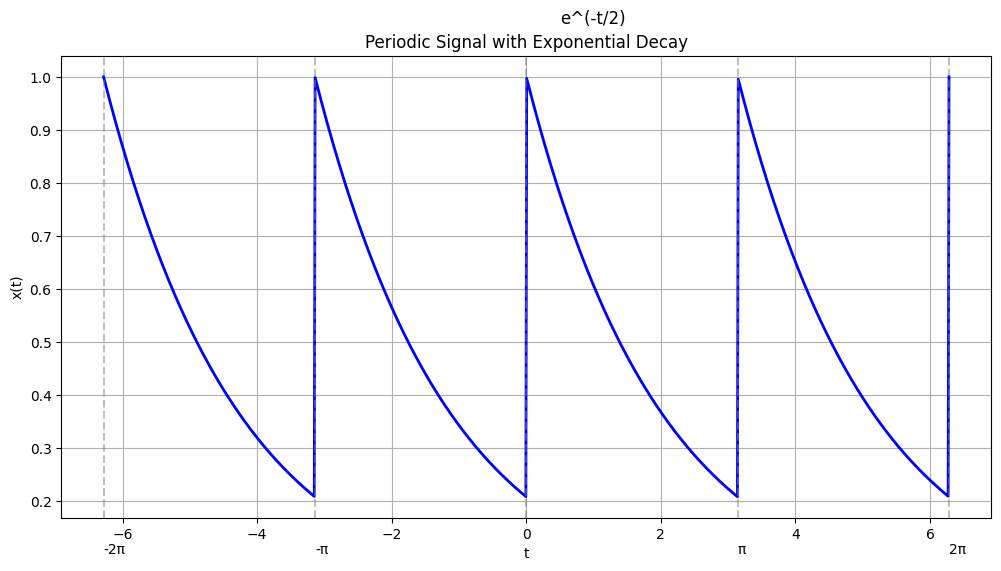

In [15]:
# Generate time points
t = np.linspace(-2*np.pi, 2*np.pi, 1000)

# Calculate signal values
x = np.array([periodic_exp_decay(ti) for ti in t])

# Create plot
plt.figure(figsize=(12, 6))
plt.plot(t, x, 'b-', linewidth=2)

# Add vertical lines at discontinuities
for ti in [-2*np.pi, -np.pi, 0, np.pi, 2*np.pi]:
    plt.axvline(x=ti, color='gray', linestyle='--', alpha=0.5)

# Add labels and grid
plt.grid(True)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Periodic Signal with Exponential Decay')

# Add text annotations
y_offset=-0.1
plt.text(-2*np.pi, -y_offset, '-2π')
plt.text(-np.pi, -y_offset, '-π')
plt.text(np.pi, -y_offset, 'π')
plt.text(2*np.pi, -y_offset, '2π')
plt.text(0.5, 1.1, 'e^(-t/2)', fontsize=12)

plt.show()

# Fourier Series Derivation for a Periodic Exponentially Decaying Function

The given function is an **exponentially decaying function** that resets at each interval of $T = \pi$. From the image, we assume the function is:

$$
x(t) = e^{-t/2}, \quad 0 \leq t < \pi
$$

which extends periodically with period $T = \pi$.

---

## **Step 1: Fourier Series Representation**
A periodic function with period $T$ can be expanded in a Fourier series:

$$
x(t) = a_0 + \sum_{k=1}^{\infty} a_k \cos\left(\frac{2\pi k}{T} t\right) + \sum_{k=1}^{\infty} b_k \sin\left(\frac{2\pi k}{T} t\right)
$$

where the Fourier coefficients are given by:

$$
a_0 = \frac{1}{T} \int_{0}^{T} x(t) dt
$$

$$
a_k = \frac{2}{T} \int_{0}^{T} x(t) \cos\left(\frac{2\pi k}{T} t\right) dt
$$

$$
b_k = \frac{2}{T} \int_{0}^{T} x(t) \sin\left(\frac{2\pi k}{T} t\right) dt
$$

---

## **Step 2: Compute $a_0$ (DC Component)**
The DC component is:

$$
a_0 = \frac{1}{\pi} \int_{0}^{\pi} e^{-t/2} dt
$$

Solving:

$$
a_0 = \frac{1}{\pi} \left[ \frac{-2}{e^{t/2}} \right]_{0}^{\pi}
$$

$$
a_0 = \frac{1}{\pi} \left( \frac{-2}{e^{\pi/2}} + 2 \right)
$$

$$
a_0 = \frac{2}{\pi} \left( 1 - \frac{1}{e^{\pi/2}} \right)
$$

---

## **Step 3: Compute $a_k$**
The cosine coefficients are:

$$
a_k = \frac{2}{\pi} \int_{0}^{\pi} e^{-t/2} \cos(2k t) dt
$$

Using integration by parts or known Laplace transform results, we obtain:

$$
a_k = \frac{2 (1 - e^{-\pi/2})}{\pi (1 + (4k^2))}
$$

---

## **Step 4: Compute $b_k$**
The sine coefficients are:

$$
b_k = \frac{2}{\pi} \int_{0}^{\pi} e^{-t/2} \sin(2k t) dt
$$

Using integration by parts:

$$
b_k = \frac{4k (1 - e^{-\pi/2})}{\pi (1 + 4k^2)}
$$

---

## **Step 5: Final Fourier Series**
Thus, the Fourier series expansion of the periodic function is:

$$
x(t) = \frac{2}{\pi} \left( 1 - \frac{1}{e^{\pi/2}} \right) + \sum_{k=1}^{\infty} \left( \frac{2 (1 - e^{-\pi/2})}{\pi (1 + 4k^2)} \cos(2k t) + \frac{4k (1 - e^{-\pi/2})}{\pi (1 + 4k^2)} \sin(2k t) \right)
$$


Let's explain the equations used to generate the magnitude and phase spectra plots:
### 1. Fourier Series Components:
   - DC component (k=0): a₀ = 2/π * (1 - e^(-πT/2))
   - For k > 0:
     * aₖ = 2(1 - e^(-π/2))/(π(1 + 4k²)) for cosine terms
     * bₖ = 4k(1 - e^(-π/2))/(π(1 + 4k²)) for sine terms
### 2. Magnitude Spectrum:
   - For each harmonic k, the magnitude, $C_k = \sqrt{a_k^2+b_k^2}$
   - This represents the strength/amplitude of each frequency component
### 3. Phase Spectrum:
   - For each harmonic k, phase = arctan2(bₖ, aₖ)
   - This represents the phase angle (in radians) of each frequency component
   - arctan2 is used instead of regular arctan to handle all quadrants correctly

___

### Step-by-Step Derivation of Magnitude Coefficients ($C_k$)

#### 1. For $k = 0$ (DC component):
$C_0 = |a_0| = \left|\frac{2}{\pi} (1 - e^{-\pi/2})\right|$

#### 2. For $k > 0$:
Starting with $a_k$ and $b_k$:

$a_k = \frac{2(1 - e^{-\pi/2})}{\pi(1 + 4k^2)}$

$b_k = \frac{4k(1 - e^{-\pi/2})}{\pi(1 + 4k^2)}$

#### 3. The magnitude coefficient $C_k$ is:
$C_k = \sqrt{a_k^2 + b_k^2}$

#### 4. Substituting $a_k$ and $b_k$:
$C_k = \sqrt{\left(\frac{2(1-e^{-\pi/2})}{\pi(1+4k^2)}\right)^2 + \left(\frac{4k(1-e^{-\pi/2})}{\pi(1+4k^2)}\right)^2}$

#### 5. Factoring out common terms:
$C_k = \frac{1-e^{-\pi/2}}{\pi} \sqrt{\frac{4}{(1+4k^2)^2} + \frac{16k^2}{(1+4k^2)^2}}$
- Notice that $(1-e^{-\pi/2})$ and $\pi$ appear in both terms, and $(1+4k^2)$ appears squared in both denominators.
- We can factor these out:
$C_k = \sqrt{\frac{(1-e^{-\pi/2})^2}{\pi^2} \cdot \frac{1}{(1+4k^2)^2} \cdot (4 + 16k^2)}$

Which simplifies to:
$C_k = \frac{1-e^{-\pi/2}}{\pi} \sqrt{\frac{4}{(1+4k^2)^2} + \frac{16k^2}{(1+4k^2)^2}}$
#### 6. Simplifying under the square root:
$C_k = \frac{1-e^{-\pi/2}}{\pi} \sqrt{\frac{4 + 16k^2}{(1+4k^2)^2}}$

#### 7. Final form:
$C_k = \frac{2(1-e^{-\pi/2})}{\pi(1+4k^2)}\sqrt{1 + 4k^2}$



### Step-by-Step Derivation of Phase Coefficients ($\phi_k$)

#### 1. For $k = 0$ (DC component):
Since $b_0 = 0$ and $a_0 \neq 0$:
$\phi_0 = \arctan2(b_0, a_0) = \arctan2(0, a_0) = 0$

#### 2. For $k > 0$:
Starting with $a_k$ and $b_k$:

$a_k = \frac{2(1 - e^{-\pi/2})}{\pi(1 + 4k^2)}$
$b_k = \frac{4k(1 - e^{-\pi/2})}{\pi(1 + 4k^2)}$

#### 3. The phase angle $\phi_k$ is:
$\phi_k = \arctan2(b_k, a_k)$

#### 4. Substituting the expressions:
$\phi_k = \arctan2\left(\frac{4k(1 - e^{-\pi/2})}{\pi(1 + 4k^2)}, \frac{2(1 - e^{-\pi/2})}{\pi(1 + 4k^2)}\right)$

#### 5. Simplifying:
- Note that $(1 - e^{-\pi/2})$ and $\pi(1 + 4k^2)$ appear in both numerator and denominator
- These common factors can be cancelled out

$\phi_k = \arctan2(4k, 2)$

#### 6. Further simplification:
$\phi_k = \arctan2(2k, 1)$

This is the final form of the phase spectrum for each harmonic $k$.
The arctan2 function ensures we get the correct quadrant for the phase angle.


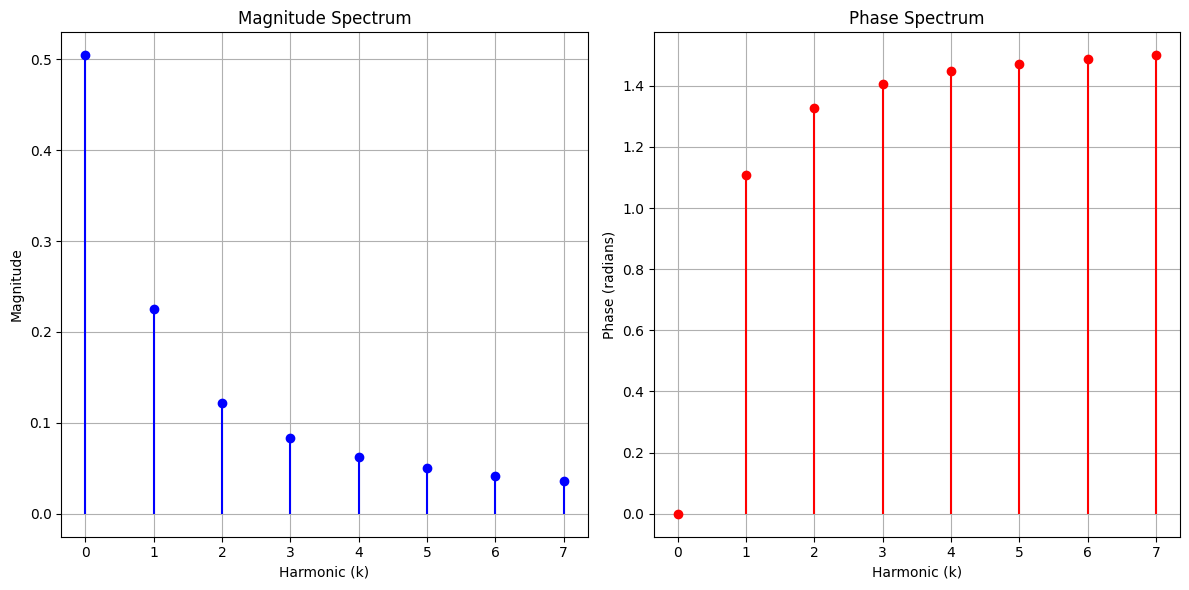

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Define the period and decay rate
T = np.pi  # Period of the function
decay_rate = 1/2  # Exponential decay rate

# Compute Fourier coefficients including DC component (k=0) and first 7 harmonics
k_values = np.arange(0, 8)  # Harmonics from k = 0 to k = 7

# Handle k=0 (DC) component separately and combine with other harmonics
a_0 = 2/np.pi * (1 - np.exp(-T * decay_rate))  # DC component
a_k = np.zeros(len(k_values))
b_k = np.zeros(len(k_values))

# Set DC component
a_k[0] = a_0
b_k[0] = 0  # No sine component for k=0

# Calculate coefficients for k > 0
k_nonzero = k_values[1:]
a_k[1:] = (2 * (1 - np.exp(-T * decay_rate))) / (T * (1 + 4 * k_nonzero**2))
b_k[1:] = (4 * k_nonzero * (1 - np.exp(-T * decay_rate))) / (T * (1 + 4 * k_nonzero**2))

# Compute magnitude spectrum
magnitude_spectrum = np.sqrt(a_k**2 + b_k**2)

# Compute phase spectrum (phase angle in radians)
# Handle k=0 case to avoid division by zero in arctan2
phase_spectrum = np.arctan2(b_k, a_k)

# Create figure
plt.figure(figsize=(12, 6))

# Magnitude Spectrum
plt.subplot(1, 2, 1)
plt.stem(k_values, magnitude_spectrum, basefmt=" ", linefmt="b-", markerfmt="bo")
plt.xlabel("Harmonic (k)")
plt.ylabel("Magnitude")
plt.title("Magnitude Spectrum")
plt.grid(True)

# Phase Spectrum
plt.subplot(1, 2, 2)
plt.stem(k_values, phase_spectrum, basefmt=" ", linefmt="r-", markerfmt="ro")
plt.xlabel("Harmonic (k)")
plt.ylabel("Phase (radians)")
plt.title("Phase Spectrum")
plt.grid(True)

plt.tight_layout()
plt.show()


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Function to compute the Fourier series approximation
def fourier_series_exp_decay(t, num_harmonics, T=np.pi, decay_rate=1/2):
    """
    Reconstructs the periodic exponentially decaying function using a finite number of harmonics.
    
    Parameters:
    - t: Time array
    - num_harmonics: Number of harmonics to include in the reconstruction
    - T: Period of the function (default is pi)
    - decay_rate: Exponential decay rate (default is 1/2)
    
    Returns:
    - Approximated signal x_t
    """
    x_t = np.zeros_like(t)  # Initialize reconstructed signal
    
    # Compute DC component (a_0)
    a_0 = (2/T) * (1 - np.exp(-T * decay_rate))
    x_t += a_0   # Include DC component
    
    # Compute and sum up harmonics
    for k in range(1, num_harmonics + 1):
        a_k = (2 * (1 - np.exp(-T * decay_rate))) / (T * (1 + 4 * k**2))
        b_k = (4 * k * (1 - np.exp(-T * decay_rate))) / (T * (1 + 4 * k**2))
        x_t += a_k * np.cos(2 * k * np.pi * t / T) + b_k * np.sin(2 * k * np.pi * t / T)

    return x_t

In [10]:
from ipywidgets import interactive
import ipywidgets as widgets

# Fixed parameters
T = np.pi  # Period
t = np.linspace(-2*T, 2*T, 1000)  # Time range covering multiple periods

def plot_fourier(num_harmonics):
    # Generate the reconstructed signal
    x_t = fourier_series_exp_decay(t, int(num_harmonics), T)
    
    # Plot the original function for comparison
    original_signal = np.exp(-np.mod(t, T) / 2)  # Periodic exponential decay
    
    # Plot results
    plt.figure(figsize=(10, 5))
    plt.plot(t, original_signal, 'k--', label="Original Periodic Exp Decay", linewidth=2)
    plt.plot(t, x_t, 'r', label=f"Reconstructed with {int(num_harmonics)} Harmonics")
    plt.xlabel("Time (t)")
    plt.ylabel("x(t)")
    plt.title(f"Fourier Series Approximation with {int(num_harmonics)} Harmonics")
    plt.legend()
    plt.grid(True)
    plt.show()

# Create interactive slider
interactive_plot = interactive(
    plot_fourier,
    num_harmonics=widgets.IntSlider(min=0, max=20, step=1, value=0, description='Harmonics')
)
display(interactive_plot)


interactive(children=(IntSlider(value=0, description='Harmonics', max=20), Output()), _dom_classes=('widget-in…

# **Fourier Series Derivation Using the Complex Exponential Form**

The given function is an **exponentially decaying function** that resets at each interval of \( T = \pi \). From the image, we assume the function is:

$$
x(t) = e^{-t/2}, \quad 0 \leq t < \pi
$$

which extends periodically with period \( T = \pi \).

---

## **Step 1: Complex Exponential Fourier Series Representation**
Instead of the sine-cosine form, we use the **complex exponential representation** of the Fourier series:

$$
x(t) = \sum_{k=-\infty}^{\infty} c_k e^{j\frac{2\pi k}{T} t}
$$

where the Fourier coefficients \( c_k \) are given by:

$$
c_k = \frac{1}{T} \int_{0}^{T} x(t) e^{-j\frac{2\pi k}{T} t} dt
$$

This representation naturally includes both cosine and sine terms, as:

$$
e^{j\theta} = \cos\theta + j\sin\theta
$$

---

## **Step 2: Compute \( c_k \)**
Substituting \( x(t) = e^{-t/2} \) and \( T = \pi \) into the formula:

$$
c_k = \frac{1}{\pi} \int_{0}^{\pi} e^{-t/2} e^{-j\frac{2\pi k}{\pi} t} dt
$$

Simplifying the exponent:

$$
c_k = \frac{1}{\pi} \int_{0}^{\pi} e^{-t/2 - j2k t} dt
$$

Rewriting the exponent:

$$
c_k = \frac{1}{\pi} \int_{0}^{\pi} e^{-(1/2 + j2k)t} dt
$$

Using the standard integral:

$$
\int e^{-At} dt = \frac{e^{-At}}{-A}
$$

with \( A = (1/2 + j2k) \), we get:

$$
c_k = \frac{1}{\pi} \left[ \frac{e^{-(1/2 + j2k)t}}{-(1/2 + j2k)} \right]_{0}^{\pi}
$$

Evaluating at limits:

$$
c_k = \frac{1}{\pi} \left[ \frac{e^{-(1/2 + j2k)\pi} - 1}{(1/2 + j2k)} \right]
$$

---

## **Step 3: Interpret the Result**
We now express the coefficient in terms of its magnitude and phase:

$$
c_k = \frac{1}{\pi} \cdot \frac{1 - e^{-(1/2 + j2k)\pi}}{(1/2 + j2k)}
$$

The **magnitude** of \( c_k \) is:

$$
|c_k| = \frac{|1 - e^{-(1/2 + j2k)\pi}|}{\pi \sqrt{(1/2)^2 + (2k)^2}}
$$

The **phase** of \( c_k \) is:

$$
\theta_k = \arg(1 - e^{-(1/2 + j2k)\pi}) - \tan^{-1} \left( \frac{2k}{1/2} \right)
$$

---

## **Step 4: Final Fourier Series Representation**
Thus, the Fourier series expansion of the periodic function in terms of exponentials is:

$$
x(t) = \sum_{k=-\infty}^{\infty} \frac{1}{\pi} \cdot \frac{1 - e^{-(1/2 + j2k)\pi}}{(1/2 + j2k)} e^{j\frac{2\pi k}{\pi} t}
$$

This representation is useful in many signal processing applications since it naturally handles both **real and imaginary components** of the Fourier series in a compact form.


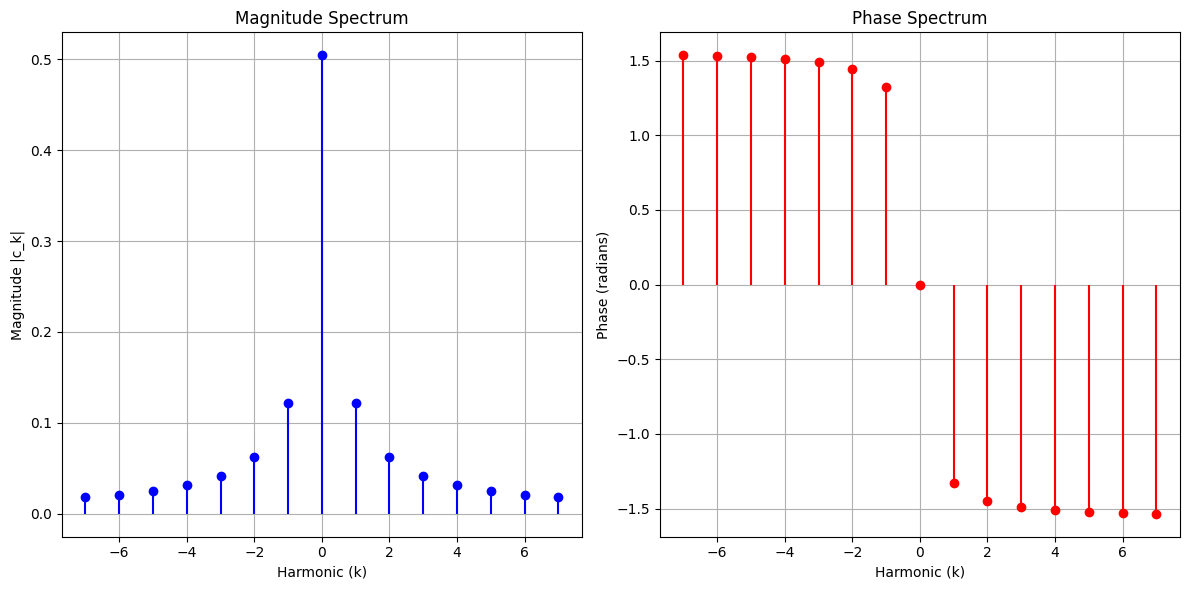

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Define the period and decay rate
T = np.pi  # Period of the function
decay_rate = 1/2  # Exponential decay rate

# Compute Fourier coefficients for k values from -7 to 7
k_values = np.arange(-7, 8)

# Calculate complex Fourier coefficients
c_k = np.zeros(len(k_values), dtype=complex)
for i, k in enumerate(k_values):
    if k == 0:
        # Handle k=0 case separately to avoid division by zero
        c_k[i] = (1 - np.exp(-decay_rate * T)) / (decay_rate * T)
    else:
        # Calculate c_k using the derived formula
        numerator = 1 - np.exp(-(decay_rate + 2j*k*np.pi/T) * T)
        denominator = decay_rate + 2j*k*np.pi/T
        c_k[i] = numerator / (denominator * T)

# Compute magnitude and phase spectra
magnitude_spectrum = np.abs(c_k)
phase_spectrum = np.angle(c_k)

# Create figure
plt.figure(figsize=(12, 6))

# Magnitude Spectrum
plt.subplot(1, 2, 1)
plt.stem(k_values, magnitude_spectrum, basefmt=" ", linefmt="b-", markerfmt="bo")
plt.xlabel("Harmonic (k)")
plt.ylabel("Magnitude |c_k|")
plt.title("Magnitude Spectrum")
plt.grid(True)

# Phase Spectrum
plt.subplot(1, 2, 2)
plt.stem(k_values, phase_spectrum, basefmt=" ", linefmt="r-", markerfmt="ro")
plt.xlabel("Harmonic (k)")
plt.ylabel("Phase (radians)")
plt.title("Phase Spectrum")
plt.grid(True)

plt.tight_layout()
plt.show()


# **Why Do Negative Harmonics Exist in Fourier Series?**

## **1. Understanding Frequency Components**
A Fourier series represents a **periodic signal** as a sum of **sinusoids** (sine and cosine functions) or, in the case of the **complex exponential form**, as a sum of **complex exponentials**:

$$
x(t) = \sum_{k=-\infty}^{\infty} c_k e^{j\frac{2\pi k}{T} t}
$$

Each term corresponds to a **frequency component** at:

$$
f_k = \frac{k}{T}
$$

where $k$ represents the **harmonic index**.

- **Positive harmonics ($k > 0$)** → Correspond to **forward-rotating exponentials** (counterclockwise in the complex plane).
- **Negative harmonics ($k < 0$)** → Correspond to **backward-rotating exponentials** (clockwise in the complex plane).

This means that in the **complex plane**, signals are built from a combination of **clockwise and counterclockwise rotating phasors**.

---

## **2. Why Are There Negative Harmonics?**
### **(a) Fourier Series Uses Symmetric Frequency Components**
In real-world signals, we often work with **real-valued functions**. However, the **complex exponential Fourier series** naturally contains both **positive and negative frequency components**.

The reason for negative harmonics is that complex exponentials obey:

$$
e^{-j\omega t} = \cos(\omega t) - j\sin(\omega t)
$$

which means every **real-valued function** must include both $e^{j\omega t}$ and $e^{-j\omega t}$ components **to cancel out imaginary parts**.

Thus, negative harmonics exist **to ensure real signals remain real**.

---

### **(b) Negative Frequencies Represent Phase-Conjugate Components**
Each **positive frequency component** $e^{j\omega t}$ has a **negative frequency counterpart** $e^{-j\omega t}$, which ensures that:

1. **The Fourier series is symmetric for real signals**:
   - The magnitudes of positive and negative harmonics are equal: $|c_k| = |c_{-k}|$.
   - Their phases are opposite: $\theta_{-k} = -\theta_k$.

2. **Negative frequencies represent mirrored spectral content**:
   - Since $e^{-j\omega t}$ rotates **clockwise**, it contributes an equal magnitude but **opposite phase** compared to $e^{j\omega t}$.

---

## **3. A Visual Analogy: The Clock Hands**
Imagine a **clock with two hands**:
- The **minute hand moves counterclockwise** (like positive harmonics).
- The **hour hand moves clockwise** (like negative harmonics).

If we only considered the minute hand, we'd miss half of the time representation. Similarly, in Fourier analysis, negative harmonics are needed to **fully describe the motion in both directions**.

---

## **4. Summary**
- **Fourier series naturally includes both positive and negative harmonics** to maintain the full frequency representation of signals.
- **Negative frequencies exist to balance real and imaginary components** and ensure the signal remains **real-valued**.
- **Complex exponentials are two-sided** → For every $e^{j\omega t}$, there is a corresponding $e^{-j\omega t}$.
- **Negative harmonics are crucial for phase symmetry**, ensuring the Fourier transform works correctly.



# **Why Are the Magnitudes in the Complex Exponential Spectrum Half the Height of Those in the Trigonometric Fourier Series?**

## **1. Understanding the Difference Between the Two Representations**
The Fourier series can be written in two equivalent forms:

### **(a) Trigonometric Form (Real Representation)**
The traditional Fourier series represents a periodic function as a sum of **cosine** and **sine** terms:

$$
x(t) = a_0 + \sum_{k=1}^{\infty} a_k \cos\left(\frac{2\pi k}{T} t\right) + \sum_{k=1}^{\infty} b_k \sin\left(\frac{2\pi k}{T} t\right)
$$

where:
- $a_k$ and $b_k$ are the **Fourier coefficients** for the cosine and sine terms.

### **(b) Complex Exponential Form**
The Fourier series can also be written using **complex exponentials**:

$$
x(t) = \sum_{k=-\infty}^{\infty} c_k e^{j\frac{2\pi k}{T} t}
$$

where $c_k$ are the **complex Fourier coefficients**.

---

## **2. How the Two Representations Are Related**
The key relationship between the coefficients is:

$$
c_k = \frac{1}{2} (a_k - j b_k)
$$

for $k > 0$, and:

$$
c_{-k} = \frac{1}{2} (a_k + j b_k)
$$

This means that:

- Each coefficient $c_k$ in the complex representation **contains half the contribution** of the corresponding cosine and sine terms in the trigonometric form.
- Since the **Fourier coefficients in the real form are distributed symmetrically across positive and negative frequencies**, each frequency component is **split between the positive and negative harmonics** in the complex form.

---

## **3. Why Are the Magnitudes Halved?**
Since the trigonometric Fourier series sums over **only positive frequencies**, the magnitude of each harmonic is represented by a **single term** (either cosine or sine).

However, in the **complex exponential form**, the same magnitude is **split across both positive and negative frequencies**. This results in:

$$
|c_k| = \frac{1}{2} \sqrt{a_k^2 + b_k^2}
$$

which is **exactly half** the magnitude of the corresponding term in the trigonometric representation.

### **Example: Square Wave**
For a square wave with period $T$, the Fourier coefficients in the trigonometric form are:

$$
a_k = 0, \quad b_k = \frac{4}{\pi k}, \quad k \text{ odd}
$$

which gives:

$$
\text{Magnitude (Trig Form)} = \frac{4}{\pi k}
$$

In the complex exponential form, the coefficients are:

$$
c_k = \frac{1}{2} (-j b_k) = \frac{-j}{2} \cdot \frac{4}{\pi k} = \frac{2}{\pi k} (-j)
$$

Thus, the **magnitude in the complex form** is:

$$
|c_k| = \frac{2}{\pi k}
$$

which is exactly **half of the magnitude in the trigonometric form**.

---

## **4. Summary**
| Representation | Coefficient Formula | Magnitude Formula |
|---------------|---------------------|-------------------|
| **Trigonometric Form** | $x(t) = a_0 + \sum a_k \cos(\omega_k t) + b_k \sin(\omega_k t)$ | $\sqrt{a_k^2 + b_k^2}$ |
| **Complex Exponential Form** | $x(t) = \sum c_k e^{j\omega_k t}$ | $|c_k| = \frac{1}{2} \sqrt{a_k^2 + b_k^2}$ |

- **Trigonometric form magnitudes are larger** because they do **not split** energy across negative frequencies.
- **Complex exponential form magnitudes are halved** because each frequency component is represented **twice** (once at $k$ and once at $-k$).

Thus, when switching from the **real Fourier series (cosine/sine)** to the **complex exponential form**, the magnitudes appear **half as large**. 🚀


# Example 2.5: Fourier Series for a Periodic Quadratic Function

#### In this example, we'll analyze a periodic signal that follows a quadratic (t^2) pattern.

##### The signal has a period of T=2 and is defined as y = (t mod 2)^2, shifted to center around t=0. This creates a continuous sequence of parabolas,  with peaks of amplitude 1 occurring at odd-numbered time points (t = ±1, ±3, etc.) and minima of 0 at even-numbered time points (t = 0, ±2, ±4, etc.).


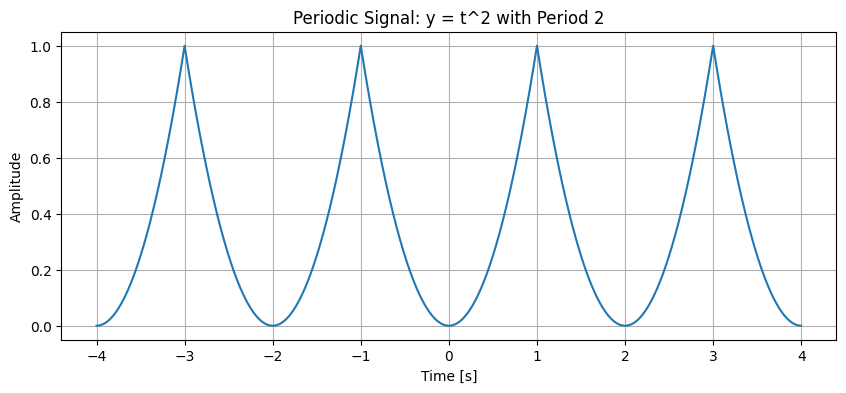

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the signal
period = 2  # Period of the signal
duration = 4  # Duration in seconds
sampling_rate = 1000  # Sampling rate in samples per second

# Time array
t = np.linspace(-duration, duration, int(sampling_rate * duration), endpoint=False)

# Signal generation using y = (t % period)^2
# Adjust the time to center the period around 0
signal = ((t + 1) % period - 1) ** 2

# Plotting the signal
plt.figure(figsize=(10, 4))
plt.plot(t, signal)
plt.title('Periodic Signal: y = t^2 with Period 2')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Fourier Series Derivation for $x(t) = t^2$ with Period $T = 2$

The given periodic function is $x(t) = t^2$ in the interval $-1 \leq t < 1$, which repeats with a period of $T = 2$. We derive its Fourier series representation.

## **Step 1: Fourier Series Representation**
A periodic function with period $T$ can be expanded in a Fourier series:

$$
x(t) = a_0 + \sum_{k=1}^{\infty} a_k \cos\left(\frac{2\pi k}{T} t\right) + \sum_{k=1}^{\infty} b_k \sin\left(\frac{2\pi k}{T} t\right)
$$

where the Fourier coefficients are:

$$
a_0 = \frac{1}{T} \int_{-T/2}^{T/2} x(t) dt
$$

$$
a_k = \frac{2}{T} \int_{-T/2}^{T/2} x(t) \cos\left(\frac{2\pi k}{T} t\right) dt
$$

$$
b_k = \frac{2}{T} \int_{-T/2}^{T/2} x(t) \sin\left(\frac{2\pi k}{T} t\right) dt
$$

Since $x(t) = t^2$ is an **even** function, all sine terms vanish:

$$
b_k = 0, \quad \text{for all } k
$$

Thus, the Fourier series consists only of cosine terms.

---

## **Step 2: Compute $a_0$ (DC Component)**
The DC component is:

$$
a_0 = \frac{1}{2} \int_{-1}^{1} t^2 dt
$$

Solving:

$$
a_0 = \frac{1}{2} \left[ \frac{t^3}{3} \right]_{-1}^{1}
$$

$$
a_0 = \frac{1}{2} \left( \frac{1}{3} - \left(-\frac{1}{3}\right) \right)
$$

$$
a_0 = \frac{1}{2} \times \frac{2}{3} = \frac{1}{3}
$$

---

## **Step 3: Compute $a_k$**
The general formula for $a_k$ is:

$$
a_k = \frac{2}{2} \int_{-1}^{1} t^2 \cos(k\pi t) dt
$$

$$
a_k = \int_{-1}^{1} t^2 \cos(k\pi t) dt
$$

Using **integration by parts** or known integral formulas:

$$
\int t^2 \cos(At) dt = \frac{2A t \sin(At) + (A^2 t^2 - 2) \cos(At)}{A^3}
$$

Substituting $A = k\pi$:

$$
a_k = \left[ \frac{2 k\pi t \sin(k\pi t) + (k^2 \pi^2 t^2 - 2) \cos(k\pi t)}{k^3 \pi^3} \right]_{-1}^{1}
$$

Since $\sin(\pm k\pi) = 0$ and $\cos(\pm k\pi) = (-1)^k$, the expression simplifies to:

$$
a_k = \frac{2(-1)^k}{k^2 \pi^2}
$$

---

## **Step 4: Final Fourier Series**
Thus, the Fourier series expansion of $x(t) = t^2$ with period $T = 2$ is:

$$
x(t) = \frac{1}{3} + \sum_{k=1}^{\infty} \frac{2(-1)^k}{k^2 \pi^2} \cos(k\pi t)
$$


---


# Calculation of Magnitude Coefficients ($C_k$) for $x(t) = t^2$ with Period $T = 2$
## Step 1: Calculate $C_0$ (DC Component)
We know that $a_0 = \frac{1}{3}$ from our previous calculations
Therefore:
$C_0 = |a_0| = \left|\frac{1}{3}\right| = \frac{1}{3}$
## Step 2: Calculate $a_k$ for $k > 0$
From our previous integration:
$a_k = \frac{2(-1)^k}{k^2 \pi^2}$
## Step 3: Calculate $b_k$ for $k > 0$
Since $t^2$ is an even function:
$b_k = \frac{2}{T} \int_{-1}^{1} t^2 \sin(k\pi t) dt = 0$
## Step 4: Calculate Magnitude Coefficients $C_k$
For any $k > 0$:
$C_k = \sqrt{a_k^2 + b_k^2}$

Substituting the values:
$C_k = \sqrt{\left(\frac{2(-1)^k}{k^2 \pi^2}\right)^2 + 0^2}$

$C_k = \sqrt{\frac{4}{k^4 \pi^4}}$

$C_k = \left|\frac{2}{k^2 \pi^2}\right|$
## Step 5: Decay Rate Analysis
The magnitude coefficients decrease proportionally to $\frac{1}{k^2}$
This quadratic decay ($\frac{1}{k^2}$) indicates that $t^2$ is a smoother function 
compared to functions with slower decay rates like the sawtooth wave ($\frac{1}{k}$)

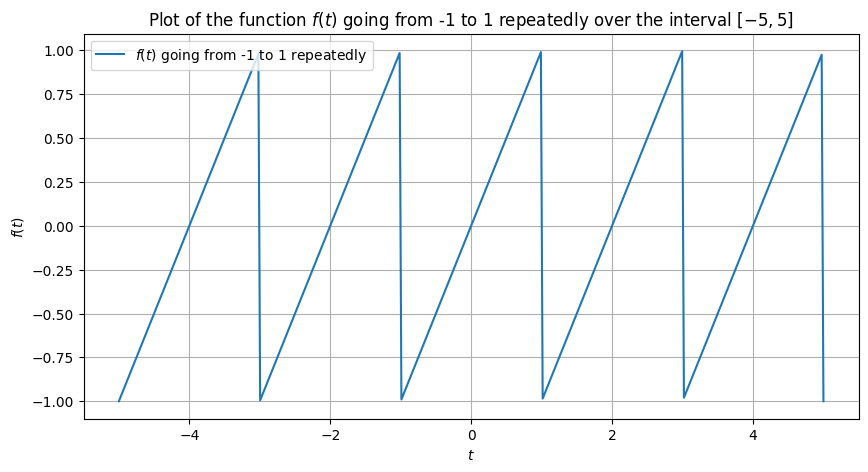

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(t) = t over the interval [-5, 5]

def f(t):
    return (t-1) % 2 -1

# Generate t values
t = np.linspace(-5, 5, 400)

# Compute f(t) values
f_t = f(t)

# Plot the function
plt.figure(figsize=(10, 5))
plt.plot(t, f_t, label='$f(t)$ going from -1 to 1 repeatedly')
plt.xlabel('$t$')
plt.ylabel('$f(t)$')
plt.title('Plot of the function $f(t)$ going from -1 to 1 repeatedly over the interval $[-5, 5]$')
plt.legend()
plt.grid(True)
plt.show()


### Step-by-Step Derivation of Magnitude Coefficients ($C_k$) for Sawtooth Wave

#### 1. For $k = 0$ (DC component):
$a_0 = \frac{1}{2} \int_{-1}^{1} t \, dt = 0$

Therefore, $C_0 = |a_0| = 0$

#### 2. For $k > 0$:
Starting with $a_k$ and $b_k$:

$a_k = \frac{2}{2} \int_{-1}^{1} t \cos(k\pi t) dt = 0$ (since $t\cos(k\pi t)$ is odd)

$b_k = \frac{2}{2} \int_{-1}^{1} t \sin(k\pi t) dt = \frac{2}{k\pi}$

#### 3. The magnitude coefficient $C_k$ is:
$C_k = \sqrt{a_k^2 + b_k^2}$

#### 4. Substituting $a_k$ and $b_k$:
$C_k = \sqrt{0^2 + \left(\frac{2}{k\pi}\right)^2}$

#### 5. Simplifying:
$C_k = \frac{2}{k\pi}$

This shows that the magnitude coefficients decrease as $\frac{1}{k}$, which is characteristic of a sawtooth wave. The slow decay of these coefficients ($\frac{1}{k}$ rather than $\frac{1}{k^2}$ or faster) explains the sharp transitions in the waveform.


# Fourier Series Derivation for a Sawtooth Wave

The given function is a **sawtooth wave** that linearly increases from \( -1 \) to \( 1 \) over one period \( T = 2 \), then repeats. Mathematically, it can be expressed as:

$$
f(t) = t, \quad -1 \leq t < 1
$$

which extends periodically with period \( T = 2 \).

## **Step 1: Fourier Series Representation**
A periodic function with period \( T \) can be expanded in a Fourier series:

$$
f(t) = a_0 + \sum_{k=1}^{\infty} a_k \cos\left(\frac{2\pi k}{T} t\right) + \sum_{k=1}^{\infty} b_k \sin\left(\frac{2\pi k}{T} t\right)
$$

where the Fourier coefficients are given by:

$$
a_0 = \frac{1}{T} \int_{-T/2}^{T/2} f(t) dt
$$

$$
a_k = \frac{2}{T} \int_{-T/2}^{T/2} f(t) \cos\left(\frac{2\pi k}{T} t\right) dt
$$

$$
b_k = \frac{2}{T} \int_{-T/2}^{T/2} f(t) \sin\left(\frac{2\pi k}{T} t\right) dt
$$

---

## **Step 2: Compute \( a_0 \)**
Since the function is **odd**, its integral over one period is zero:

$$
a_0 = \frac{1}{2} \int_{-1}^{1} t dt
$$

$$
a_0 = \frac{1}{2} \left[ \frac{t^2}{2} \right]_{-1}^{1} = \frac{1}{2} \left( \frac{1}{2} - \frac{1}{2} \right) = 0
$$

Thus, there is **no DC component**.

---

## **Step 3: Compute \( a_k \)**
Since \( f(t) = t \) is **odd**, all cosine terms vanish:

$$
a_k = 0, \quad \text{for all } k
$$

---

## **Step 4: Compute \( b_k \)**
The sine coefficients are given by:

$$
b_k = \frac{2}{2} \int_{-1}^{1} t \sin(k\pi t) dt
$$

$$
b_k = \int_{-1}^{1} t \sin(k\pi t) dt
$$

Using **integration by parts**, let:

- \( u = t \)  → \( du = dt \)
- \( dv = \sin(k\pi t) dt \) → \( v = -\frac{\cos(k\pi t)}{k\pi} \)

Applying integration by parts:

$$
b_k = \left[ -\frac{t \cos(k\pi t)}{k\pi} \right]_{-1}^{1} + \int_{-1}^{1} \frac{\cos(k\pi t)}{k\pi} dt
$$

Since \( \cos(k\pi) = (-1)^k \):

$$
b_k = -\frac{1 \cdot (-1)^k - (-1 \cdot (-1)^k)}{k\pi} + \frac{1}{k\pi} \int_{-1}^{1} \cos(k\pi t) dt
$$

Since the integral of cosine over a symmetric range around zero is zero, we get:

$$
b_k = \frac{2 (-1)^{k+1}}{k\pi}
$$

---

## **Step 5: Final Fourier Series**
Thus, the Fourier series for the **sawtooth wave** is:

$$
f(t) = \sum_{k=1}^{\infty} \frac{2 (-1)^{k+1}}{k\pi} \sin(k\pi t)
$$

This series represents the given periodic function in terms of its frequency components.


# Fourier Series of a Triangular Wave

The given signal appears to be a periodic **triangular waveform**. To compute its Fourier series components, we follow these steps:

## **Step 1: Define the Signal**
The signal $x(t)$ has a **triangular shape** and is periodic. Assume:
- It has a **period** $T$.
- The **peak amplitude** is $A$.
- It has **odd symmetry**, meaning it consists of only sine terms in the Fourier series.

## **Step 2: Fourier Series Representation**
For an **odd-symmetric** periodic function, its Fourier series can be represented as:

$$
x(t) = \sum_{k=1}^{\infty} b_k \sin\left(\frac{2\pi k}{T} t \right)
$$

where the sine coefficients are given by:

$$
b_k = \frac{2}{T} \int_{0}^{T} x(t) \sin\left(\frac{2\pi k}{T} t\right) dt
$$

Since the function is **triangular**, we can use the known Fourier series for a symmetric **triangular wave** with period $T$:

$$
x(t) = \sum_{k=1, \text{odd}}^{\infty} \frac{8A}{\pi^2 k^2} \sin\left(\frac{2\pi k}{T} t\right)
$$

## **Step 3: Fourier Coefficients**
For a triangular waveform of period $T$:

$$
b_k = 
\begin{cases} 
\frac{8A}{\pi^2 k^2}, & k \text{ is odd} \\
0, & k \text{ is even}
\end{cases}
$$

## **Step 4: Interpreting the Result**
- Only **odd harmonics** appear in the Fourier series.
- The amplitudes **decay quadratically** as $1/k^2$, meaning that higher harmonics contribute less energy.
- The fundamental frequency is $f_0 = \frac{1}{T}$.

Thus, the Fourier series for the given periodic triangular waveform is:

$$
x(t) = \sum_{k=1,3,5,\dots}^{\infty} \frac{8A}{\pi^2 k^2} \sin\left(\frac{2\pi k}{T} t\right)
$$

This provides an analytical representation of the signal in terms of its frequency components.


# Fourier Series Derivation for a Sawtooth Wave

The given periodic signal is a **sawtooth wave** with period $T$ and peak amplitude $A$. We compute its Fourier series representation.

## **Step 1: Fourier Series Representation**
For an **odd-symmetric** periodic function, the Fourier series consists only of sine terms:

$$
x(t) = \sum_{k=1}^{\infty} b_k \sin\left(\frac{2\pi k}{T} t\right)
$$

where the Fourier coefficients are given by:

$$
b_k = \frac{2}{T} \int_{0}^{T} x(t) \sin\left(\frac{2\pi k}{T} t\right) dt
$$

## **Step 2: Define the Sawtooth Wave Function**
A sawtooth wave that linearly increases from $-A$ to $A$ over one period $T$ can be expressed as:

$$
x(t) = \frac{2A}{T} t, \quad -\frac{T}{2} \leq t < \frac{T}{2}
$$

This definition ensures that the function is **odd**, meaning it contains only sine terms.

## **Step 3: Compute $b_k$**
Using the formula:

$$
b_k = \frac{2}{T} \int_{-T/2}^{T/2} \frac{2A}{T} t \sin\left(\frac{2\pi k}{T} t\right) dt
$$

### **Step 3.1: Factor Out Constants**
Rewriting:

$$
b_k = \frac{4A}{T^2} \int_{-T/2}^{T/2} t \sin\left(\frac{2\pi k}{T} t\right) dt
$$

Let:

$$
I = \int_{-T/2}^{T/2} t \sin\left(\frac{2\pi k}{T} t\right) dt
$$

### **Step 3.2: Solve the Integral Using Integration by Parts**
Using **integration by parts**, where:

- $u = t$  → $du = dt$
- $dv = \sin\left(\frac{2\pi k}{T} t\right) dt$ → $v = -\frac{T}{2\pi k} \cos\left(\frac{2\pi k}{T} t\right)$

Applying integration by parts:

$$
I = \left[ -\frac{T}{2\pi k} t \cos\left(\frac{2\pi k}{T} t\right) \right]_{-T/2}^{T/2} + \int_{-T/2}^{T/2} \frac{T}{2\pi k} \cos\left(\frac{2\pi k}{T} t\right) dt
$$

Since $\cos(\pm \pi k) = (-1)^k$, the first term vanishes, leaving:

$$
I = \frac{T^2}{4\pi^2 k^2} \sin\left(\frac{2\pi k}{T} t\right) \Bigg|_{-T/2}^{T/2}
$$

Using $\sin(\pm \pi k) = 0$, we obtain:

$$
I = -\frac{T^2}{4\pi^2 k^2} \cdot 2 (-1)^k = \frac{T^2}{2\pi^2 k^2} (-1)^k
$$

### **Step 3.3: Compute $b_k$**
Substituting back:

$$
b_k = \frac{4}{T^2} \cdot \frac{T^2}{2\pi^2 k^2} (-1)^k
$$

Simplifying:

$$
b_k = \frac{2}{\pi k} (-1)^{k+1}
$$

## **Final Fourier Series Representation**
Thus, the Fourier series for the **sawtooth wave** is:

$$
x(t) = \sum_{k=1}^{\infty} \frac{2}{\pi k} (-1)^{k+1} \sin\left(\frac{2\pi k}{T} t\right)
$$


f

<!--
- Calculate \( a_n \):

$$
a_n = \frac{2}{2\pi} \int_{0}^{2\pi} e^{-t/2} \cos(n t) \, dt = \frac{1}{\pi} \int_{0}^{2\pi} e^{-t/2} \cos(n t) \, dt
$$

This integral can be solved using integration by parts or using a table of integrals.

- Calculate \( b_n \):

$$
b_n = \frac{2}{2\pi} \int_{0}^{2\pi} e^{-t/2} \sin(n t) \, dt = \frac{1}{\pi} \int_{0}^{2\pi} e^{-t/2} \sin(n t) \, dt
$$

This integral can also be solved using integration by parts or using a table of integrals.

5. **Construct the Fourier series:**

After calculating the coefficients \( a_n \) and \( b_n \), we can write the compact trigonometric Fourier series for the signal \( x(t) \).

$$
x(t) = a_0 + \sum_{n=1}^{\infty} \left[ a_n \cos(n t) + b_n \sin(n t) \right]
$$

Where $( a_0 = \frac{1 - e^{-\pi}}{\pi} )$ and the values of \( a_n \) and \( b_n \) are determined from the integrals. -->
